In [1]:
import pandas as pd
import torch 
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable

In [2]:
data= pd.read_csv('/home/ashiya/iris/iris-species/Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [6]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [8]:
categorical_variable=data.dtypes[data.dtypes=="object"].index.values

In [9]:
categorical_variable

array(['Species'], dtype=object)

In [10]:
for var in categorical_variable:
    data[var]=le.fit_transform(data[var])

In [11]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [12]:
del data['Id']

In [13]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [14]:
data_array = data.as_matrix()

In [15]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
xtrain = data_array[:,:4]

In [17]:
ytrain = data_array[:,4]

In [18]:
ytrain.shape

(150,)

In [19]:
hl = 10
lr = 0.01
num_epoch = 500

In [20]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1=nn.Linear(4,hl)
        self.fc2=nn.Linear(hl,3)
    
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=self.fc2(x)
        return (x)

In [21]:
net=Net()

In [22]:
pram=list(net.parameters())

In [23]:
pram

[Parameter containing:
 -0.0674 -0.3608  0.2865  0.3304
  0.1406  0.4261  0.0040 -0.4930
  0.4105 -0.2829 -0.2885 -0.4903
  0.4046  0.3575  0.2848 -0.0580
  0.1340 -0.3976 -0.0665  0.1811
 -0.0373  0.4114  0.0479 -0.2832
  0.3401  0.2585  0.2147 -0.1058
  0.3437  0.0757  0.0397  0.4349
 -0.4638 -0.0476 -0.3094  0.2753
  0.0415  0.2077  0.1409 -0.3445
 [torch.FloatTensor of size 10x4], Parameter containing:
  0.3463
 -0.0574
 -0.0396
 -0.2361
  0.3799
 -0.4805
 -0.0718
 -0.1369
 -0.1878
 -0.3096
 [torch.FloatTensor of size 10], Parameter containing:
 -0.1548  0.0412 -0.2504  0.1128 -0.1736 -0.1171 -0.1118  0.2401  0.1390 -0.1936
 -0.2326  0.0889  0.2148 -0.0925  0.3115  0.2388 -0.2641 -0.1864 -0.0839 -0.1400
  0.1062 -0.0998 -0.0472  0.0861 -0.3059  0.0261 -0.1073  0.0833 -0.1149 -0.0427
 [torch.FloatTensor of size 3x10], Parameter containing:
 -0.2720
 -0.1265
 -0.1721
 [torch.FloatTensor of size 3]]

In [24]:
pram[0]

Parameter containing:
-0.0674 -0.3608  0.2865  0.3304
 0.1406  0.4261  0.0040 -0.4930
 0.4105 -0.2829 -0.2885 -0.4903
 0.4046  0.3575  0.2848 -0.0580
 0.1340 -0.3976 -0.0665  0.1811
-0.0373  0.4114  0.0479 -0.2832
 0.3401  0.2585  0.2147 -0.1058
 0.3437  0.0757  0.0397  0.4349
-0.4638 -0.0476 -0.3094  0.2753
 0.0415  0.2077  0.1409 -0.3445
[torch.FloatTensor of size 10x4]

In [25]:
print(net)

Net(
  (fc1): Linear(in_features=4, out_features=10)
  (fc2): Linear(in_features=10, out_features=3)
)


In [26]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(net.parameters(),lr=0.1)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=.1)

In [29]:
X_train.shape

(135, 4)

In [30]:
X_train.dtype

dtype('float64')

In [31]:
y_train.dtype

dtype('float64')

In [32]:
all_losses=[]

In [33]:
for epoch in range(num_epoch):
    X=Variable(torch.Tensor(X_train).float())
    Y=Variable(torch.Tensor(y_train).long())
    optimizer.zero_grad()
    out=net(X)
    loss=criterion(out,Y)
    all_losses.append(loss.data)
    loss.backward()
    optimizer.step()
    
    if (epoch) % 50 == 0:
        print ('Epoch [%d/%d] Loss: %.4f' %(epoch+1, num_epoch, loss.data[0]))

Epoch [1/500] Loss: 1.5244
Epoch [51/500] Loss: 0.4342
Epoch [101/500] Loss: 0.3468
Epoch [151/500] Loss: 0.2935
Epoch [201/500] Loss: 0.2414
Epoch [251/500] Loss: 0.1903
Epoch [301/500] Loss: 0.1455
Epoch [351/500] Loss: 0.1047
Epoch [401/500] Loss: 0.0994
Epoch [451/500] Loss: 0.0854


In [34]:
X = Variable(torch.Tensor(X_test).float())
Y = torch.Tensor(y_test).long()

In [35]:
out = net(X)

In [36]:
_, predicted = torch.max(out.data, 1)

In [37]:
Y.shape

torch.Size([15])

In [38]:
torch.sum(Y==predicted)/15

0.9333333333333333

In [39]:
print('accuracy is %d %%' %(100*torch.sum(Y==predicted)/15))

accuracy is 93 %


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [41]:
all_losses=np.array(all_losses, dtype=np.float)

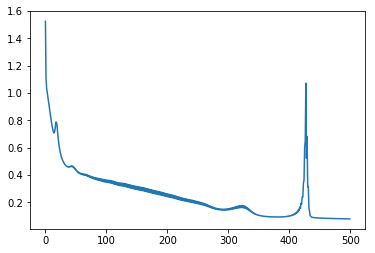

In [42]:
plt.plot(all_losses)